# Introduction to Scikit-Learn (sklearn)

This notebook demonstrates some of the most useful functions of  beautiful Scikit-learn library

What we're going to cover:

0. An end-to-end sklearn workflow
1. Getting the data ready
2. Choose the right estimators/algorithm for our problems
3. Fit the model/algorithm & use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together

## 0. An end-to-end sklearn workflow

In [6]:
import numpy as np

In [7]:
# 1. Get the data ready
import pandas as pd
heartDisease = pd.read_csv('data/heart-disease.csv')
heartDisease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Create X(feature matrix)
X = heartDisease.drop('target', axis=1)

# Create Y(labels)
y = heartDisease.target

In [4]:
# 2. Create the right model and hyerparamenters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# we will keep default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3. Fit the model to the data
from sklearn.model_selection import train_test_split

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.3)

In [6]:
clf.fit(XTrain, yTrain);

In [7]:
XTrain

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
238,77,1,0,125,304,0,0,162,1,0.0,2,3,2
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3
218,65,1,0,135,254,0,0,127,0,2.8,1,1,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
142,42,0,2,120,209,0,1,173,0,0.0,1,0,2
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3


In [8]:
# make a prediction
ylabel = clf.predict(np.array([0, 2, 3, 4]))

ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
XTest

In [97]:
y_preds = clf.predict(XTest)
y_preds

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [98]:
yTest

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: target, Length: 102, dtype: float64

In [ ]:
# 4, Evaluate the model on training data and test data
clf.score(XTrain, yTrain)

In [ ]:
clf.score(XTest, yTest)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(yTest, y_preds))

In [ ]:
confusion_matrix(yTest, y_preds)

In [ ]:
accuracy_score(yTest, y_preds)

In [ ]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(20, 120, 50):
    print(f"Trying classifier for {i} ") 
    clf = RandomForestClassifier(n_estimators=i).fit(XTrain, yTrain)
    print(f"Model accouracy on test set:{clf.score(XTest, yTest) * 100:.2f}%")
    print("")

In [ ]:
# 6. Save the model and load it
import pickle

pickle.dump(clf, open("models/randomForestModel.pkl", "wb"))

In [ ]:
loaded_model = pickle.load(open("models/randomForestModel.pkl", "rb"))
loaded_model.score(XTest, yTest)

## 1. Getting data ready to be used with M/L

There are 3 main things, we need to do:
    
    1. Split the data into features and labels usually 'X's & 'y's
    2. Filling or disregarding missing values
    3. Converting non-numerical values to numerical values(also called feature encoding)

In [ ]:
heartDisease.head()

In [ ]:
X = heartDisease.drop("target", axis=1) # Axis 1=age,sex, cp,trestbps,chol, fbs, restecg, thalach, exang, oldpeak, slope, ca,thal

X.head()

In [ ]:
y = heartDisease.target
y.head()

In [ ]:
XTrain.shape, XTest.shape, yTrain.shape, yTest.shape

In [ ]:
X.shape[0] * 0.8

In [ ]:
242 + 61

In [ ]:
len(heartDisease)

## 1.1 Make sure its all numerical

In [ ]:
carSales = pd.read_csv("data/car-sales-extended.csv")

In [ ]:
carSales.head()

In [ ]:
carSales.Doors.value_counts()

In [ ]:
len(carSales)

In [ ]:
carSales.dtypes

In [ ]:
# Split into X/y
X = carSales.drop("Price", axis=1)
y = carSales.Price

# Spit into training and test
XTrain, XTest, yTrain, yTest = train_test_split(X,
                                               y,
                                               test_size=0.2)

In [ ]:
# Build M/L model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(XTrain, yTrain)
model.score(XTest, yTest)

In [ ]:
X.head()

In [ ]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categoricalFeatures = ["Make", "Colour","Doors"]
oneHot = OneHotEncoder()
transformer = ColumnTransformer([("oneHot",
                                oneHot,
                                 categoricalFeatures)],
                               remainder="passthrough")
transformedX = transformer.fit_transform(X)
transformedX

In [ ]:
pd.DataFrame(transformedX)

In [ ]:
X.head()

In [ ]:
dummies = pd.get_dummies(carSales[["Make", "Colour", "Doors"]])
dummies

In [ ]:
# Let's refit the model
np.random.seed(42)
XTrain, XTest, yTrain, yTest = train_test_split(transformedX,
                                               y,
                                               test_size = 0.2)

model.fit(XTrain, yTrain)

In [ ]:
X.head()

In [ ]:
model.score(XTest, yTest)

## 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation).
2. Remove samples with missing data altogether.

In [ ]:
# Import carSales missing data
carSalesMissing = pd.read_csv("data/car-sales-extended-missing-data.csv")
carSalesMissing

In [ ]:
carSalesMissing.isna().sum()

In [ ]:
# Create X & y
X = carSalesMissing.drop("Price", axis= 1)
y = carSalesMissing.Price

In [ ]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categoricalFeatures = ["Make", "Colour","Doors"]
oneHot = OneHotEncoder()
transformer = ColumnTransformer([("oneHot",
                                oneHot,
                                 categoricalFeatures)],
                               remainder="passthrough")
transformedX = transformer.fit_transform(X)
transformedX

In [ ]:
carSalesMissing

#### Option 1: Fill missing data with Pandas

In [ ]:
carSalesMissing.Doors.value_counts()

In [ ]:
# Fill the 'Make' column
carSalesMissing.Make.fillna("missing", inplace=True)

# Fill the "Colour" column 
carSalesMissing.Colour.fillna("missing", inplace=True)

# Fill the "Odometer (KM)" column
carSalesMissing["Odometer (KM)"].fillna(carSalesMissing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors column"
carSalesMissing.Doors.fillna(4, inplace=True)

In [ ]:
# Checkout data frame again
carSalesMissing.isna().sum()

In [ ]:
carSalesMissing.dropna(inplace=True)

In [ ]:
carSalesMissing.isna().sum()

In [ ]:
len(carSalesMissing)

In [ ]:
X = carSalesMissing.drop("Price", axis=1)
y = carSalesMissing.Price

In [ ]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categoricalFeatures = ["Make", "Colour","Doors"]
oneHot = OneHotEncoder()
transformer = ColumnTransformer([("oneHot",
                                oneHot,
                                 categoricalFeatures)],
                               remainder="passthrough")
transformedX = transformer.fit_transform(X)
transformedX

### Option 2: Fill missing values with Scikit-Learn

In [ ]:
carSalesMissing = pd.read_csv("data/car-sales-extended-missing-data.csv")

In [ ]:
carSalesMissing

In [ ]:
# Drop the rows with no labels
carSalesMissing.dropna(subset=["Price"], inplace=True)
carSalesMissing.isna().sum()

In [ ]:
# Split into X & y
X = carSalesMissing.drop("Price", axis=1)
y = carSalesMissing.Price

In [ ]:
X.isna().sum()

In [ ]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
catImputer = SimpleImputer(strategy='constant', fill_value="missing")
doorImputer = SimpleImputer(strategy='constant', fill_value=4)
numImputer= SimpleImputer(strategy='mean')

# Define Columns
catFeatures = ['Make', 'Colour']
doorFeature = ["Doors"]
numFeatures = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("catImputer", catImputer, catFeatures),
    ("doorImputer", doorImputer, doorFeature),
    ("numImputer", numImputer, numFeatures)
])

# Transform the data
filledX = imputer.fit_transform(X)
filledX

In [ ]:
carSalesFilled = pd.DataFrame(filledX,
                             columns=["Make", "Colour", "Doors", "Odometer (KM)"])
carSalesFilled

In [ ]:
carSalesFilled.isna().sum()

In [ ]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categoricalFeatures = ["Make", "Colour","Doors"]
oneHot = OneHotEncoder()
transformer = ColumnTransformer([("oneHot",
                                oneHot,
                                 categoricalFeatures)],
                               remainder="passthrough")
transformedX = transformer.fit_transform(carSalesFilled)
transformedX

In [ ]:
# Now we 've' got our data as numbers and filled (no missing values)
# Let's fit the model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

XTrain, XTest, yTrain, yTest = train_test_split(transformedX,
                                               y,
                                               test_size = 0.2)
model = RandomForestRegressor()
model.fit(XTrain, yTrain)
model.score(XTest, yTest)

In [ ]:
len(carSalesFilled), len(carSales)

## 2. Choosing the right estimator/algorithm for our problem

Scikit-learn uses estimator as another term for machine learning model or algorithm

* Classification - predicting whether sample is one thing or another
* Regression - predicting a number

Step 1- Check the Scikit-Learn machine learning map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a m/l model for a regression problem

In [10]:
# Import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston;

In [11]:
bostonDf = pd.DataFrame(boston["data"], columns=boston["feature_names"])
bostonDf["target"] = pd.Series(boston["target"])
bostonDf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# How many samples?
len(bostonDf)

In [ ]:
# Let's try the Ridge Regression model
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data 
X = bostonDf.drop("target", axis=1)
y = bostonDf.target

# Split into train and test sets
XTrain, XTest, yTrain, yTest = train_test_split(X,
                                               y, 
                                               test_size=0.2)

# Instantiate the Ridge model
model = Ridge()
model.fit(XTrain, yTrain)

# Check the score of Ridge model on test data
model.score(XTest, yTest)

How do we improve score?

What if Ridge wasn't working?

Let's refer back to map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [ ]:
# Let's try Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = bostonDf.drop("target", axis=1)
y = bostonDf.target

# Split the data
XTrain, XTest, yTrain, yTest = train_test_split(X,
                                               y, 
                                               test_size=0.2)

# Instantiate the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(XTrain, yTrain)

# Check the score of Ridge model on test data
rf.score(XTest, yTest)

In [71]:
# Check the Ridge model again
model.score(XTest, yTest)

0.6662221670168522

### 2.2 Choosing and estimator for classification problem

Let's go to the map...https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [72]:
heartDisease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [73]:
len(heartDisease)

303

Consulting the map and it says to try `LinearSVC`

In [74]:
# Import the LinarSVC estimator class
from sklearn.svm import LinearSVC

# Setup the random seed
np.random.seed(42)

# Make the data
X = heartDisease.drop("target", axis=1)
y = heartDisease.target

# Split the data
XTrain, XTest, yTrain, yTest = train_test_split(X,
                                               y,
                                               test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC(max_iter=1000)
clf.fit(XTrain, yTrain)

# Evaluate the LinearSVC
clf.score(XTest, yTest)

0.8688524590163934

In [75]:
heartDisease.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [76]:
# Import the `RandomForestClassifier` estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup the random seed
np.random.seed(42)

# Make the data
X = heartDisease.drop("target", axis=1)
y = heartDisease.target

# Split the data
XTrain, XTest, yTrain, yTest = train_test_split(X,
                                               y,
                                               test_size=0.2)

# Instantiate RandomForesrtClassifier
clf = RandomForestClassifier()
clf.fit(XTrain, yTrain)

# Evaluate the RandomForestClassifier
clf.score(XTest, yTest)

0.8524590163934426

Titbit:

    1. If you have structured data, use ensemble methods
    2. If youu have unstructured data, use Deeplearning or trasfer learning

In [77]:
heartDisease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 3. Fit the model/ algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

Different names for
* `X` = features, feature variables, data
* `y` = labels, targets, target variables

In [78]:
# Import the `RandomForestClassifier` estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup the random seed
np.random.seed(42)

# Make the data
X = heartDisease.drop("target", axis=1)
y = heartDisease.target

# Split the data
XTrain, XTest, yTrain, yTest = train_test_split(X,
                                               y,
                                               test_size=0.2)

# Instantiate RandomForesrtClassifier
clf = RandomForestClassifier()
print(clf)
# Fit the model to the data(training machine learning model)
clf.fit(XTrain, yTrain)

# Evaluate the RandomForestClassifier(use the patterns the model has learned)
clf.score(XTest, yTest)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


0.8524590163934426

In [79]:
X.head(), X.tail(), y.head(), y.tail() 

(   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   63    1   3       145   233    1        0      150      0      2.3      0   
 1   37    1   2       130   250    0        1      187      0      3.5      0   
 2   41    0   1       130   204    0        0      172      0      1.4      2   
 3   56    1   1       120   236    0        1      178      0      0.8      2   
 4   57    0   0       120   354    0        1      163      1      0.6      2   
 
    ca  thal  
 0   0     1  
 1   0     2  
 2   0     2  
 3   0     2  
 4   0     2  ,
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 298   57    0   0       140   241    0        1      123      1      0.2   
 299   45    1   3       110   264    0        1      132      0      1.2   
 300   68    1   0       144   193    1        1      141      0      3.4   
 301   57    1   0       130   131    0        1      115      1      1.2   
 302   57    0   1       130  

# Random Forest model Deepdive

Resources for Random Forest Models

* [Random Forest Wikipedia][1]

* [Random Forest in python][2] by yhat

* [An Implementation and Explanation of the Random Forest in Python][3]

[1]:https://en.wikipedia.org/wiki/Random_forest
[2]:http://blog.yhat.com/posts/random-forests-in-python.html#:~:text=by%20yhat%20%7C%20June%205%2C%202013&text=Random%20forest%20is%20capable%20of,about%20random%20forests%20using%20Python
[3]:https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76

### 3.2 Make predictions using a machine learning model
2 ways to make predictions:
  1. `predict()`
  2. `predict_proba()`
  

In [81]:
# Use a trained model to make predictions
clf.predict(np.array([1, 7, 8, 3, 4]))

ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [82]:
XTest.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [83]:
clf.predict(XTest)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [84]:
np.array(yTest)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [85]:
# Compare prediction to truth labels to evaluate the model
yPreds = clf.predict(XTest)
np.mean(yPreds == yTest)

0.8524590163934426

In [86]:
clf.score(XTest, yTest)

0.8524590163934426

In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(yTest, yPreds)

0.8524590163934426

Make predictions with `predict_proba()`

In [90]:
# predict_proba() returns probabilities of classification label
clf.predict_proba(XTest[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [91]:
# Let's predict() on same data...
clf.predict(XTest[:5])

array([0, 1, 1, 0, 1])

In [92]:
heartDisease.target.value_counts()

1    165
0    138
Name: target, dtype: int64

`predict()` can also be used in regreesion models 

In [93]:
bostonDf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create data
X = bostonDf.drop('target', axis=1)
y = bostonDf.target

# Split into X and y
XTrain, XTest, yTrain, yTest = train_test_split(X,
                                                y,
                                                test_size=0.2)

# Instantiate and fit the model
model = RandomForestRegressor().fit(XTrain, yTrain)

# Make predictions
yPreds = model.predict(XTest)

In [17]:
yPreds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [18]:
np.array(yPreds)

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639, 19.787, 19.541,  8.583, 21.85 , 19.531, 25.851,
       19.759,  8.22 , 45.109, 14.712, 24.548, 23.956, 14.548, 22.944,
       15.023, 14.643, 21.137, 14.153, 19.232, 20.666, 19.588, 23.254,
       33.01 , 20.461, 14.271, 15.889, 34.704, 19.154, 20.85 , 24.395,
       18.978, 29.84 , 45.302, 19.447, 22.234, 13.751, 15.511, 24.612,
       18.729, 28.235, 21.21 , 34.218, 17.271, 26.147, 45.279, 21.924,
       15.532, 32.412, 22.212, 20.453, 25.532, 34.326, 28.795, 18.951,
       27.145, 17.181, 13.534, 23.04 , 28.714, 15.802, 20.451, 27.87 ,
       10.193, 21.507, 22.383,  7.265, 20.089, 45.388, 10.88 , 13.053,
       21.322, 12.366, 20.233,  9.135, 20.052, 26.787, 15.277, 23.267,
       23.613, 17.699, 21.617,  7.921, 19.475, 18.807, 22.386, 19.836,
       38.714, 13.159, 12.476, 13.612, 20.205, 23.832])

In [14]:
from sklearn.model_selection import train_test_split

In [19]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error

mean_absolute_error(yTest, yPreds)

2.136382352941176

## 4. Evaluating a m/l Model

There are 3 ways to evaluate Scikit-Learn models/estimators:

1. Estimator `score` method
2. `Scoring` parameter
3. Metric functions

### 4.1 Evaluating with estimating `score` method

In [22]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heartDisease.drop("target", axis=1)
y = heartDisease.target

XTrain, XTest, yTrain, yTest = train_test_split(X,
                                                y,
                                                test_size=0.2)

clf = RandomForestClassifier()

clf.fit(XTrain, yTrain)



RandomForestClassifier()

In [24]:
clf.score(XTrain, yTrain)

1.0

In [25]:
clf.score(XTest, yTest)

0.8524590163934426

Let's do same but for regression... 

In [29]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create data
X = bostonDf.drop('target', axis=1)
y = bostonDf.target

# Split into X and y
XTrain, XTest, yTrain, yTest = train_test_split(X,
                                                y,
                                                test_size=0.2)

# Instantiate and fit the model
model = RandomForestRegressor().fit(XTrain, yTrain)

In [32]:
model.score(XTest, yTest)

0.8654448653350507

### 4.2 Evaluating a model using `scoring` parameter

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heartDisease.drop("target", axis=1)
y = heartDisease.target

XTrain, XTest, yTrain, yTest = train_test_split(X,
                                                y,
                                                test_size=0.2)

clf = RandomForestClassifier()

clf.fit(XTrain, yTrain)

RandomForestClassifier()

In [34]:
clf.score(XTest, yTest)

0.8524590163934426

In [38]:
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.90163934, 0.80327869, 0.8       , 0.78333333])

In [39]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.83870968, 0.87096774, 0.93333333, 0.86666667,
       0.8       , 0.66666667, 0.83333333, 0.73333333, 0.83333333])

In [45]:
np.random.seed(42)

# Single training and test split score
clfSingleScore = clf.score(XTest, yTest)

# Take the mean of 5 cross-val scores
clfCrossValScore = (np.mean(cross_val_score(clf, X, y, cv=5)))

# Compare the two
clfSingleScore, clfCrossValScore

(0.8524590163934426, 0.8248087431693989)

In [47]:
# Default scoring parameter of classifier = mean accuracy
clf.score()

TypeError: score() missing 2 required positional arguments: 'X' and 'y'

In [48]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.81967213, 0.86885246, 0.80327869, 0.76666667, 0.8       ])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [57]:
heartDisease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heartDisease.drop("target", axis=1)
y = heartDisease.target

clf = RandomForestClassifier()

CrossValScore = cross_val_score(clf, X, y, cv=5)

In [55]:
c = np.mean(CrossValScore)

In [56]:
print(f"Heart Disease Classifier Cross-Validated Accuracy:{c * 100:.2f}%")

Heart Disease Classifier Accuracy:82.48%


**Area under the reciever operating curve(AUC/ROC)**
* Area under curve(AUC)
* ROC curve

RIC curve are a comparison of a model's true positive rate(tpr) vs a model's false positive rate(fpr)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [69]:
# Create XTest..., etc
XTrain, XTest, yTrain, yTest = train_test_split(X,
                                                y,
                                                test_size=0.2)

In [70]:
from sklearn.metrics import roc_curve

# Fit the clssifier
clf.fit(XTrain, yTrain)

# Make predictions with probabilities
yProb = clf.predict_proba(XTest)
yProb[:10], len(yProb)

(array([[0.32, 0.68],
        [0.18, 0.82],
        [0.22, 0.78],
        [0.26, 0.74],
        [0.03, 0.97],
        [0.11, 0.89],
        [0.04, 0.96],
        [0.54, 0.46],
        [0.92, 0.08],
        [0.1 , 0.9 ]]),
 61)

In [71]:
yProbPositive = yProb[:, 1]
yProbPositive

array([0.68, 0.82, 0.78, 0.74, 0.97, 0.89, 0.96, 0.46, 0.08, 0.9 , 0.9 ,
       0.35, 0.11, 0.81, 0.5 , 0.12, 0.99, 0.1 , 0.79, 0.99, 0.15, 0.27,
       0.08, 0.97, 0.54, 0.81, 0.29, 0.11, 0.71, 0.1 , 0.09, 0.09, 0.28,
       0.94, 0.02, 0.02, 0.22, 0.86, 0.73, 0.09, 0.95, 0.79, 0.51, 0.06,
       0.92, 0.76, 0.18, 0.92, 0.08, 0.69, 0.02, 0.23, 0.86, 0.97, 0.74,
       0.51, 0.83, 0.25, 0.44, 0.87, 0.1 ])

In [72]:
yProbPositive[:10]

array([0.68, 0.82, 0.78, 0.74, 0.97, 0.89, 0.96, 0.46, 0.08, 0.9 ])

In [73]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(yTest, yProbPositive)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.03703704, 0.03703704, 0.03703704,
       0.03703704, 0.03703704, 0.03703704, 0.07407407, 0.07407407,
       0.07407407, 0.07407407, 0.07407407, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.18518519, 0.18518519, 0.25925926,
       0.25925926, 0.44444444, 0.51851852, 0.85185185, 0.88888889,
       1.        ])

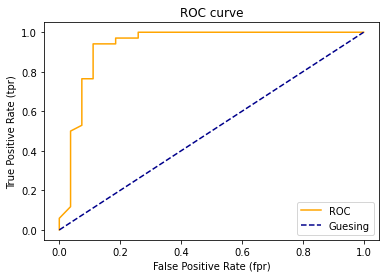

In [75]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plotRocCurve(fpr, tpr):
    """
    Plot a ROC curve given the false positive rate (fpr) and true positive rate(tpr) 
    """
    
    # Plot roc curve
    plt.plot(fpr, tpr,color="orange", label="ROC")
    # Plot line with no predictive power(baseline)
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guesing")
    
    # Customise the plot
    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True Positive Rate (tpr)")
    plt.title("ROC curve")
    plt.legend()
    plt.show()

plotRocCurve(fpr, tpr)

In [76]:
from sklearn.metrics import roc_auc_score

roc_auc_score(yTest, yProbPositive)

0.9330065359477124

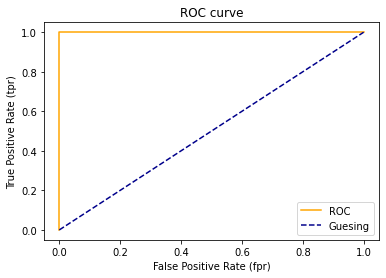

In [79]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(yTest, yTest)
plotRocCurve(fpr,tpr)

In [80]:
# Perfect AUC Score
roc_auc_score(yTest, yTest)

1.0

**Confusion Matrix**